# Softmax Classifier using Tensoflow

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
import numpy as np

In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.test.labels.shape

(10000, 10)

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12823491192128869276
]


In [7]:
x = tf.placeholder(tf.float32,[None,784]) #x is a place holder which can hold 32 bit float values 

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [8]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
y_ = tf.placeholder(tf.float32,[None,10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices = [1]))

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [11]:
sess  = tf.InteractiveSession()

tf.global_variables_initializer().run()

In [12]:
for _ in range(1000):
    batch_xs, batch_ys= mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: batch_xs, y_: batch_ys})

In [13]:
correct_prediction  = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

0.902


In [14]:
import matplotlib.pyplot as plt
import time
%matplotlib notebook
def plt_dynamic(x,y,y_l,ax,colors=['b']):
    ax.plot(x,y,'b',label = "Train Loss")
    ax.plot(x,y_l,'r',label = "Test Loss")
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


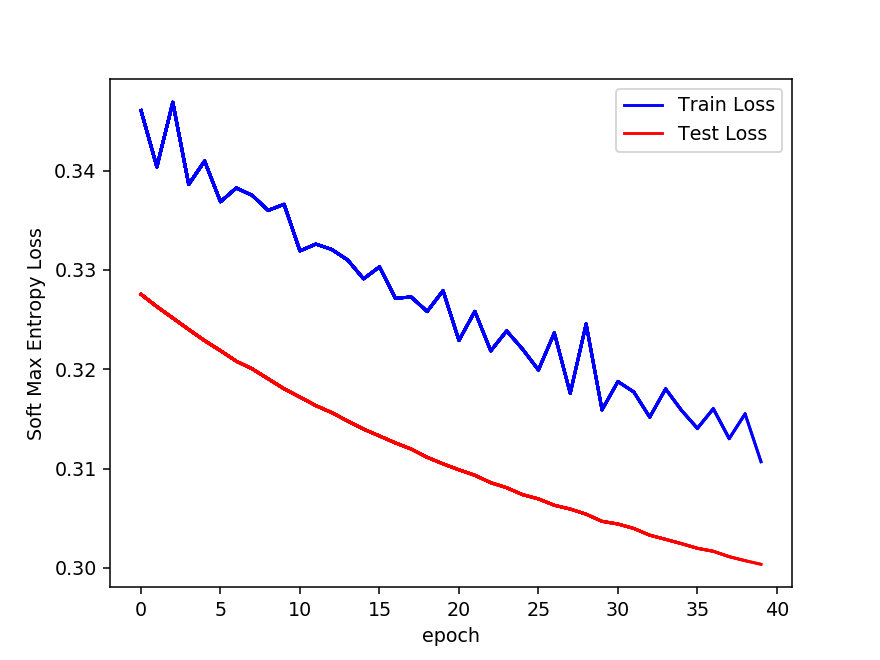

Accuracy : 0.9175


In [16]:
%matplotlib notebook
training_epochs = 40
batch_size = 1000

display_setup = 1
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices = [1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Soft Max Entropy Loss')
xs, ytrs, ytes = [],[],[]
for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train_step , cross_entropy],feed_dict = {x: batch_xs, y_: batch_ys})
        train_avg_cost  += c/total_batch
        c = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        test_avg_cost += c/total_batch
    
    xs.append(epoch)
    ytrs.append(train_avg_cost)
    ytes.append(test_avg_cost)
    plt_dynamic(xs, ytrs, ytes, ax)
        
plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction  = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy :", accuracy.eval({x: mnist.test.images, y_ : mnist.test.labels}))